<a href="https://colab.research.google.com/github/shahnewaz007/softcomp3/blob/main/170104103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook Prepared by: Ayon

Course Teacher: Sanzana Karim Lora

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SoftComp/Assignment 3/Dataset 2.csv', encoding = "ISO-8859-1")
df.head()

,text,polarity
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


# Data Preprocessing

## Stopword Remove

In [ ]:
#REMOVING THE STOP WORDS
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df

,text,polarity
0,"real good moment. missssssssss much,",0
1,reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need send 'em accountant tomorrow. Odd...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,"No Depression G Herbo mood on, i'm done stress...",1
10310,What depression succumbs brain makes feel like...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake bad day depression! everyone 'em!,1


## Url Remove

In [ ]:
#REMOVING URL
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
df['text'] = df['text'].apply(lambda text: remove_urls(text))
df

,text,polarity
0,"real good moment. missssssssss much,",0
1,reading manga,0
2,@comeagainjen -,0
3,@lapcat Need send 'em accountant tomorrow. Odd...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,"No Depression G Herbo mood on, i'm done stress...",1
10310,What depression succumbs brain makes feel like...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake bad day depression! everyone 'em!,1


## Mention Remove

In [ ]:
def remove_mention(s):
    s = re.sub(r'@[\S]+', ' ', s)
    return s
df['text'] = df['text'].apply(lambda text: remove_mention(text))
df

,text,polarity
0,"real good moment. missssssssss much,",0
1,reading manga,0
2,-,0
3,"Need send 'em accountant tomorrow. Oddly, I ...",0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,"No Depression G Herbo mood on, i'm done stress...",1
10310,What depression succumbs brain makes feel like...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake bad day depression! everyone 'em!,1


## Number Remove

In [ ]:
def remove_number(s):
    s = ''.join(c for c in s if not c.isdigit())
    return s
df['text'] = df['text'].apply(lambda text: remove_number(text))
df

,text,polarity
0,"real good moment. missssssssss much,",0
1,reading manga,0
2,-,0
3,"Need send 'em accountant tomorrow. Oddly, I ...",0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,"No Depression G Herbo mood on, i'm done stress...",1
10310,What depression succumbs brain makes feel like...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake bad day depression! everyone 'em!,1


## Punctuation Remove

In [ ]:
#REMOVING PUNCTUATIONS
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '') 
    return text
df['text'] = df['text'].apply(remove_punctuations)
df

,text,polarity
0,real good moment missssssssss much,0
1,reading manga,0
2,,0
3,Need send em accountant tomorrow Oddly I eve...,0
4,ADD ME ON MYSPACE myspacecomLookThunder,0
...,...,...
10309,No Depression G Herbo mood on im done stressin...,1
10310,What depression succumbs brain makes feel like...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake bad day depression everyone em,1


## Converting Lowercase

In [ ]:
#CONVERTING TO LOWERCASE
df['text'] = df['text'].str.lower()
df

,text,polarity
0,real good moment missssssssss much,0
1,reading manga,0
2,,0
3,need send em accountant tomorrow oddly i eve...,0
4,add me on myspace myspacecomlookthunder,0
...,...,...
10309,no depression g herbo mood on im done stressin...,1
10310,what depression succumbs brain makes feel like...,1
10311,ketamine nasal spray shows promise against dep...,1
10312,dont mistake bad day depression everyone em,1


## Stemming

In [ ]:
#STEMMING
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df['text'] = df['text'].apply(lambda text: stem_words(text))
df

,text,polarity
0,real good moment missssssssss much,0
1,read manga,0
2,,0
3,need send em account tomorrow oddli i even ref...,0
4,add me on myspac myspacecomlookthund,0
...,...,...
10309,no depress g herbo mood on im done stress peop...,1
10310,what depress succumb brain make feel like neve...,1
10311,ketamin nasal spray show promis against depres...,1
10312,dont mistak bad day depress everyon em,1


## Empty Row Remove

In [ ]:
df['text'].replace('', np.nan, inplace=True)

In [ ]:
df

,text,polarity
0,real good moment missssssssss much,0
1,read manga,0
3,need send em account tomorrow oddli i even ref...,0
4,add me on myspac myspacecomlookthund,0
5,sleepi good time tonight though,0
...,...,...
10308,mani suffer depress sad feel noth all persist ...,1
10309,no depress g herbo mood on im done stress peop...,1
10310,what depress succumb brain make feel like neve...,1
10311,ketamin nasal spray show promis against depres...,1


In [ ]:
df.dropna(subset=['text'], inplace=True)

In [ ]:
df

,text,polarity
0,real good moment missssssssss much,0
1,read manga,0
3,need send em account tomorrow oddli i even ref...,0
4,add me on myspac myspacecomlookthund,0
5,sleepi good time tonight though,0
...,...,...
10308,mani suffer depress sad feel noth all persist ...,1
10309,no depress g herbo mood on im done stress peop...,1
10310,what depress succumb brain make feel like neve...,1
10311,ketamin nasal spray show promis against depres...,1


# Train Test Split

In [ ]:
df_train,df_test,y_train,y_test=train_test_split(df['text'],df['polarity'],test_size=0.2,random_state=42)
print('DF Train Shape: ',df_train.shape)
print('DF Test Shape: ',df_test.shape)
print('Y Train Shape: ',y_train.shape)
print('Y Test Shape: ',y_test.shape)

DF Train Shape:  (8228,)
DF Test Shape:  (2058,)
Y Train Shape:  (8228,)
Y Test Shape:  (2058,)


# Tokenize Tweet

In [ ]:
max_words=10000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(df_train)
sequence_train=tokenizer.texts_to_sequences(df_train)
sequence_test=tokenizer.texts_to_sequences(df_test)

In [ ]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('dataset has %s number of independent tokens' %V)

dataset has 11873 number of independent tokens


# Pad Sequence

In [ ]:
data_train=pad_sequences(sequence_train)
data_train.shape

(8228, 52)

In [ ]:
T=data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape

(2058, 52)

# CNN

In [ ]:
D=20
i=Input((T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(5,activation='softmax')(x)
model=Model(i,x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 52)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 52, 20)            237480    
_________________________________________________________________
conv1d (Conv1D)              (None, 50, 32)            1952      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 14, 64)            6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 64)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2, 128)            24704 

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_senti=model.fit(data_train,y_train,validation_data=(data_test,y_test),epochs=5,batch_size=100)

Epoch 1/5
83/83 [==============================] - 3s 20ms/step - loss: 0.6634 - accuracy: 0.7814 - val_loss: 0.4483 - val_accuracy: 0.8285
Epoch 2/5
83/83 [==============================] - 1s 16ms/step - loss: 0.3981 - accuracy: 0.8549 - val_loss: 0.3848 - val_accuracy: 0.8630
Epoch 3/5
83/83 [==============================] - 1s 15ms/step - loss: 0.3419 - accuracy: 0.8821 - val_loss: 0.3789 - val_accuracy: 0.8659
Epoch 4/5
83/83 [==============================] - 1s 17ms/step - loss: 0.3092 - accuracy: 0.8997 - val_loss: 0.3807 - val_accuracy: 0.8601
Epoch 5/5
83/83 [==============================] - 1s 16ms/step - loss: 0.2961 - accuracy: 0.9067 - val_loss: 0.3887 - val_accuracy: 0.8605


In [ ]:
y_pred=model.predict(data_test)
y_pred

array([[8.99967790e-01, 9.96790752e-02, 2.23669675e-04, 5.95214588e-05,
        6.98194926e-05],
       [3.39533290e-09, 1.00000000e+00, 1.82843676e-13, 1.33573614e-14,
        2.37753000e-15],
       [9.09941137e-01, 8.97946730e-02, 1.70007464e-04, 4.31499357e-05,
        5.10822683e-05],
       ...,
       [8.99967790e-01, 9.96790752e-02, 2.23669675e-04, 5.95214588e-05,
        6.98194926e-05],
       [8.99967790e-01, 9.96790752e-02, 2.23669675e-04, 5.95214588e-05,
        6.98194926e-05],
       [8.99967909e-01, 9.96790603e-02, 2.23669718e-04, 5.95214660e-05,
        6.98195072e-05]], dtype=float32)

In [ ]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

# Result

Text(33.0, 0.5, 'y_pred')

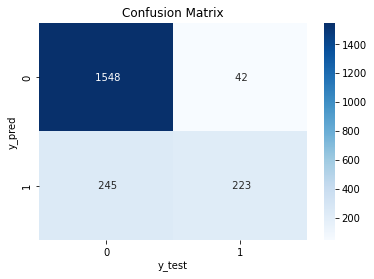

In [ ]:
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [ ]:
print('Accuracy: ' +str(round(accuracy_score(y_test, y_pred) * 100, 4)))
print('Precision: ' +str(round(precision_score(y_test, y_pred, average='micro') * 100, 4)))
print('Recall: ' +str(round(recall_score(y_test, y_pred, average='micro') * 100, 4)))
print('F1 score: ' +str(round(f1_score(y_test, y_pred, average='micro')  * 100, 4)))

Accuracy: 86.0544
Precision: 86.0544
Recall: 86.0544
F1 score: 86.0544


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.92      1590
           1       0.84      0.48      0.61       468

    accuracy                           0.86      2058
   macro avg       0.85      0.73      0.76      2058
weighted avg       0.86      0.86      0.85      2058



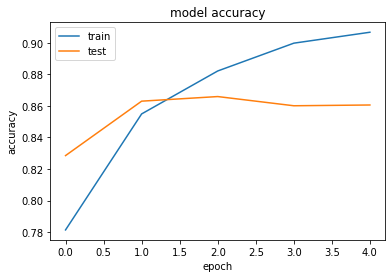

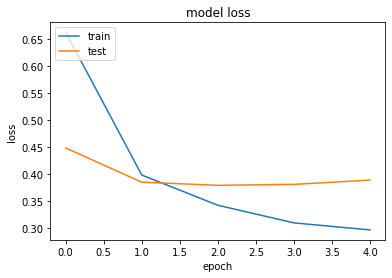

In [ ]:
plt.plot(cnn_senti.history['accuracy'])
plt.plot(cnn_senti.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(cnn_senti.history['loss'])
plt.plot(cnn_senti.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Prediction

In [ ]:
twt = ['Jahidul is nice']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=T, dtype='int32', value=0)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if np.argmax(sentiment) == 0:
  print("negative")
elif np.argmax(sentiment) == 1:
  print("positive")

1/1 - 0s
negative
